In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# **This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease**

In [3]:
data=pd.read_csv("/content/heart.csv")

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
label_data=data["target"]

In [9]:
train_data=data.drop("target",axis=1)

In [10]:
train_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.3,random_state=42)

In [18]:
scale=StandardScaler()
scale_data=scale.fit(X_train)

In [19]:
X_train=scale_data.transform(X_train)
X_test=scale_data.transform(X_test)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
pred=model.predict(X_test)

In [27]:
accuracy_score(Y_test,pred)

0.8051948051948052

In [48]:
cf_matrix=confusion_matrix(Y_test,pred)
label_name=["No_Disease","Disease"]

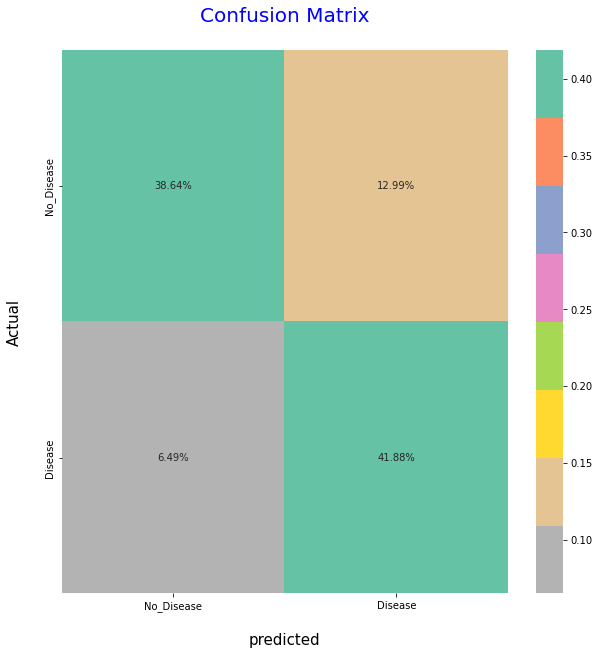

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap='Set2_r',xticklabels=label_name,yticklabels=label_name)
plt.xlabel("\npredicted",fontsize=15,color="black")
plt.ylabel("Actual\n",color="black",fontsize=15)
plt.title("Confusion Matrix\n",color="blue",fontsize=20)
plt.show()

In [52]:
print(classification_report(Y_test,pred,target_names=["No Disease","Disease"]))

              precision    recall  f1-score   support

  No Disease       0.86      0.75      0.80       159
     Disease       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308

